<a href="https://colab.research.google.com/github/naidu199/Machine_Learn/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
#reading the data
data=pd.read_csv("https://raw.githubusercontent.com/nandu19k/polynomial-regression/master/Position_Salaries.csv")
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [103]:
#taking x,y values
x=data.iloc[:,1:2].values
y=data.iloc[:,-1].values

In [104]:
#spliting the data into testing and training
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.35)

In [105]:
#linear regression on the data
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)


LinearRegression()

In [106]:
#predicting the testing output
yp=lr.predict(xtest)


In [107]:
#r^2 error for linear regression
from sklearn.metrics import r2_score
r2_score(ytest,yp)

0.4429392234367854

In [117]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=4)
xpr=pr.fit_transform(xtrain) #x polynomial regression of train
xprt=pr.fit_transform(xtest) #x polynomial regression of test
xp=pr.fit_transform(x)
lr2=LinearRegression()
lr2.fit(xpr,ytrain)


LinearRegression()

In [118]:
yprt=lr2.predict(xprt)#y predicted test
yp=lr2.predict(xp)



In [112]:
#r2 score with training and testing data
from sklearn.metrics import r2_score
r2_score(ytest,yprt)


0.9483036656787504

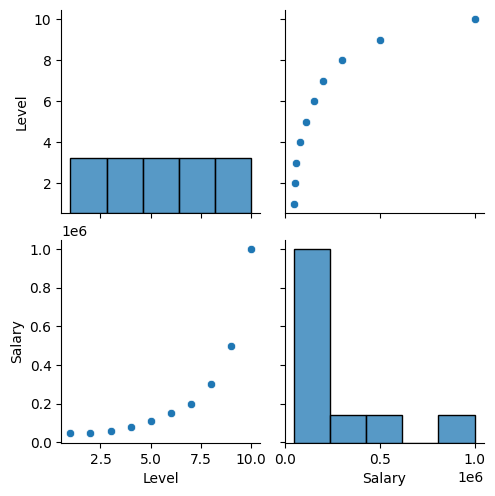

In [114]:
df=data.iloc[: ,[1,2]]
sns.pairplot(df)

Text(0, 0.5, 'salary')

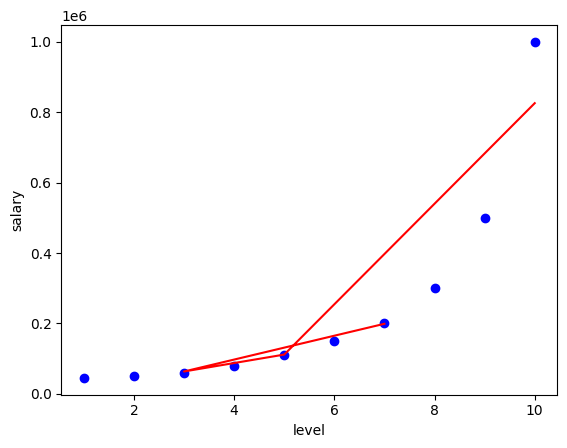

In [129]:
#graph for testing and traing
plt.scatter(x,y,color="blue")
plt.plot(xtest,yprt,color="red")
plt.xlabel("level")
plt.ylabel("salary")

Text(0, 0.5, 'salary')

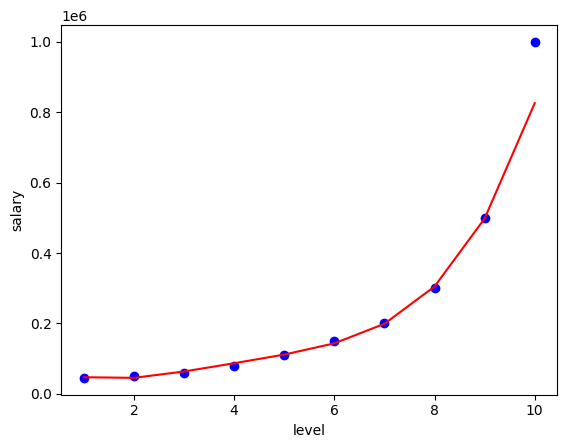

In [128]:
#graph for complete data
plt.scatter(x,y,color="blue")
plt.plot(x,yp,color="red")
plt.xlabel("level")
plt.ylabel("salary")

In [125]:
r=lr2.predict(pr.fit_transform([[5.5]]))
r

array([125618.99038459])

In [124]:
#r2 score of complete data
r2_score(y,yp)

0.9622340829318725

In [130]:
#r2 score of testing and training
r2_score(ytest,yprt)

0.9483036656787504